# **Final Project: Customer Personality Analysis**
Trong dự án này, Nhóm em dựa vào bộ dữ liệu [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) để giải quyết một số câu hỏi mà nhóm em tự đề ra.

**Nhóm 3**       
* Tên nhóm: **1xB**   
* Gồm 2 thành viên:
    * 22120390 - Bùi Trọng Trịnh
    * 22120332 - Nguyễn Lê Phúc Thắng

# **0. Thư viện cần dùng trong Final Project**

In [23]:
import os  # Thư viện làm việc với hệ điều hành, cung cấp các chức năng xử lý tệp, thư mục, và biến môi trường.
import kagglehub  # Thư viện hỗ trợ tải dữ liệu trực tiếp từ Kaggle, tiện lợi trong các dự án phân tích dữ liệu.
import shutil  # Thư viện cung cấp các chức năng cao cấp để sao chép, di chuyển, và xóa tệp hoặc thư mục.
import pandas as pd  # Thư viện mạnh mẽ để xử lý và phân tích dữ liệu, hỗ trợ cấu trúc dữ liệu như DataFrame và Series.
import seaborn as sns  # Thư viện trực quan hóa dữ liệu dựa trên Matplotlib, cung cấp các biểu đồ đẹp và dễ sử dụng.
import matplotlib.pyplot as plt  # Thư viện vẽ đồ thị, hỗ trợ tạo các biểu đồ tùy chỉnh.

# **1. Thu thập dữ liệu**

## 1.1 Tải dataset [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) về thư mục làm việc

In [24]:
def download_and_save_data(dataset_id, dataset_folder):
    # Lấy thư mục làm việc hiện tại và tạo thư mục lưu dataset
    current_directory = os.getcwd()
    dataset_path = os.path.join(current_directory, dataset_folder)

    # Tạo thư mục nếu chưa tồn tại
    os.makedirs(dataset_path, exist_ok=True)
    print(f"Thư mục lưu dataset: {dataset_path}")

    # Tải dataset từ Kaggle
    downloaded_folder = kagglehub.dataset_download(dataset_id)
    print(f"Dataset đã được tải về: {downloaded_folder}")

    # Xác định thư mục gốc (thư mục `imakash3011`)
    root_folder = os.path.abspath(os.path.join(downloaded_folder, os.pardir))  # Lấy thư mục cha của `downloaded_folder`

    # Chỉ di chuyển các file CSV
    for file_name in os.listdir(downloaded_folder):
        if file_name.endswith(".csv"):  # Lọc các file CSV
            file_path = os.path.join(downloaded_folder, file_name)
            shutil.copy(file_path, dataset_path)
            print(f"Đã sao chép file: {file_name} -> {dataset_path}")
    print("Hoàn tất tải và sao chép file đến thư mục cần làm việc")

# ID của dataset trên Kaggle
dataset_id = "imakash3011/customer-personality-analysis"

# Tên thư mục để lưu dataset
dataset_folder = "DataSet"

# Gọi hàm tải và lưu dataset
download_and_save_data(dataset_id, dataset_folder)

Thư mục lưu dataset: f:\KHDL\Final-Project\DataSet
Dataset đã được tải về: C:\Users\GIGABYTE\.cache\kagglehub\datasets\imakash3011\customer-personality-analysis\versions\1
Đã sao chép file: marketing_campaign.csv -> f:\KHDL\Final-Project\DataSet
Hoàn tất tải và sao chép file đến thư mục cần làm việc


## 1.2 Đọc file csv và lưu vào DataFrame

In [25]:
# Đọc file CSV và lưu vào DataFrame
def read_csv_to_dataframe(file_path):
    try:
        # Đọc file CSV
        df = pd.read_csv(file_path, delimiter='\t')
        print("File CSV đã được đọc thành công!")
        return df
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file '{file_path}'.")
        return None
    except Exception as e:
        print(f"Lỗi khi đọc file: {e}")
        return None

# Đường dẫn file CSV
current_dataset_path = "DataSet/marketing_campaign.csv"
file_path = current_dataset_path  # Thay bằng đường dẫn file của bạn

# Đọc file và lưu vào DataFrame
data_df = read_csv_to_dataframe(file_path)
data_df

File CSV đã được đọc thành công!


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# **2. Khám phá dữ liệu**

## 2.1 Dữ liệu có bao nhiêu hàng và bao nhiêu cột?

In [26]:
rows, columns = data_df.shape
print("Dữ liệu có", rows, "hàng và", columns, "cột")

Dữ liệu có 2240 hàng và 29 cột


## 2.2 Ý nghĩa của mỗi hàng là gì?

Trong bộ dữ liệu [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis), mỗi hàng đại diện cho một khách hàng.

## 2.3. Có hàng nào bị trùng lặp không?

In [27]:
if data_df.duplicated().sum() == 0:
    print("Không có hàng nào bị trùng lặp")
else:
    print("Có hàng bị lặp")

Không có hàng nào bị trùng lặp


## 2.4 Ý nghĩa của mỗi cột là gì?

Đặc tính con người
- ID: Mã định danh duy nhất của khách hàng
- Year_Birth: Năm sinh của khách hàng
- Educatio : Trình độ học vấn của khách hàng
- Marital_Statu : Tình trạng hôn nhân của khách hàng
- Incom : Thu nhập hàng năm của hộ gia đình khách hàng
- Kidhom : Số trẻ em trong hộ gia đình của khách hàng
- Teenhom : Số thanh thiếu niên trong hộ gia đình của khách hàng
- Dt_Custome : Ngày khách hàng đăng ký với công ty
- Recency : Số ngày kể từ lần mua hàng cuối cùng của khách hàng
- Complain : 1 nếu khách hàng đã khiếu nại trong 2 năm qua, 0 nếu không

Đặc tính sản phẩm
- MntWine : Số tiền đã chi cho rượu vang trong 2 năm qua
- MntFruit : Số tiền đã chi cho trái cây trong 2 năm qua
- MntMeatProduct : Số tiền đã chi cho các sản phẩm thịt trong 2 năm qua
- MntFishProduct : Số tiền đã chi cho các sản phẩm cá trong 2 năm qua
- MntSweetProduct : Số tiền đã chi cho các sản phẩm ngọt trong 2 năm qua
- MntGoldProd : Số tiền đã chi cho vàng trong 2 năm qua

Đặc tính khuyến mãi
- NumDealsPurchase : Số lần mua hàng với chiết khấu
- AcceptedCmp : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 1, 0 nếu không
- AcceptedCmp : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 2, 0 nếu không
- AcceptedCmp : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 3, 0 nếu không
- AcceptedCmp : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 4, 0 nếu không
- AcceptedCmp : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 5, 0 nếu không
- Respons : 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch gần nhất, 0 nếu không

Đặc tính đặc điểm mua
- NumWebPurchase : Số lần mua hàng qua trang web của công ty
- NumCatalogPurchase : Số lần mua hàng qua danh mục sản phẩm
- NumStorePurchase : Số lần mua hàng trực tiếp tại cửa hàng
- NumWebVisitsMont : Số lượt truy cập trang web của công ty trong tháng vừa qua


## 2.5 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào không phù hợp không?

Sử dụng .dtypes để xem kiểu dữ liệu của từng cột.

In [28]:
data_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Dữ liệu các cột đều phù hợp

## 2.6 Với mỗi cột dạng số, giá trị được phân phối như thế nào?

Sử dụng .describe() để xem các thống kê như giá trị nhỏ nhất (min), lớn nhất (max), trung bình (mean), và phân vị (quartiles).

In [29]:
numerical_columns = data_df.select_dtypes(include=['int64', 'float64']).columns
numerical_distribution = data_df[numerical_columns].describe()
numerical_distribution

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## 2.7 Kiểm tra tỷ lệ giá trị bị thiếu với .isnull().mean() * 100

In [30]:
missing_percentage = data_df.isnull().mean() * 100
missing_percentage

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Nhận thấy cột `Income` có 1.071429 % là NULL nên ta sẽ làm sạch bằng cách gán giá trị NULL bằng 0

In [31]:
data_df['Income'] = data_df['Income'].fillna(0)

## 2.8 Với mỗi cột dạng phân loại, giá trị được phân phối như thế nào?

Các giá trị trong từng cột xuất hiện bao nhiêu lần và tỷ lệ (%) của mỗi giá trị trong cột.


In [32]:
categorical_columns = data_df.select_dtypes(include=['object', 'category']).columns
categorical_distribution = {col: data_df[col].value_counts(normalize=True) for col in categorical_columns}
categorical_distribution

{'Education': Education
 Graduation    0.503125
 PhD           0.216964
 Master        0.165179
 2n Cycle      0.090625
 Basic         0.024107
 Name: proportion, dtype: float64,
 'Marital_Status': Marital_Status
 Married     0.385714
 Together    0.258929
 Single      0.214286
 Divorced    0.103571
 Widow       0.034375
 Alone       0.001339
 Absurd      0.000893
 YOLO        0.000893
 Name: proportion, dtype: float64,
 'Dt_Customer': Dt_Customer
 31-08-2012    0.005357
 12-05-2014    0.004911
 14-02-2013    0.004911
 12-09-2012    0.004911
 22-05-2014    0.004464
                 ...   
 01-11-2013    0.000446
 10-08-2013    0.000446
 11-10-2012    0.000446
 20-12-2012    0.000446
 09-01-2014    0.000446
 Name: proportion, Length: 663, dtype: float64}

## 2.9 Tương quan giữa các đặc trưng

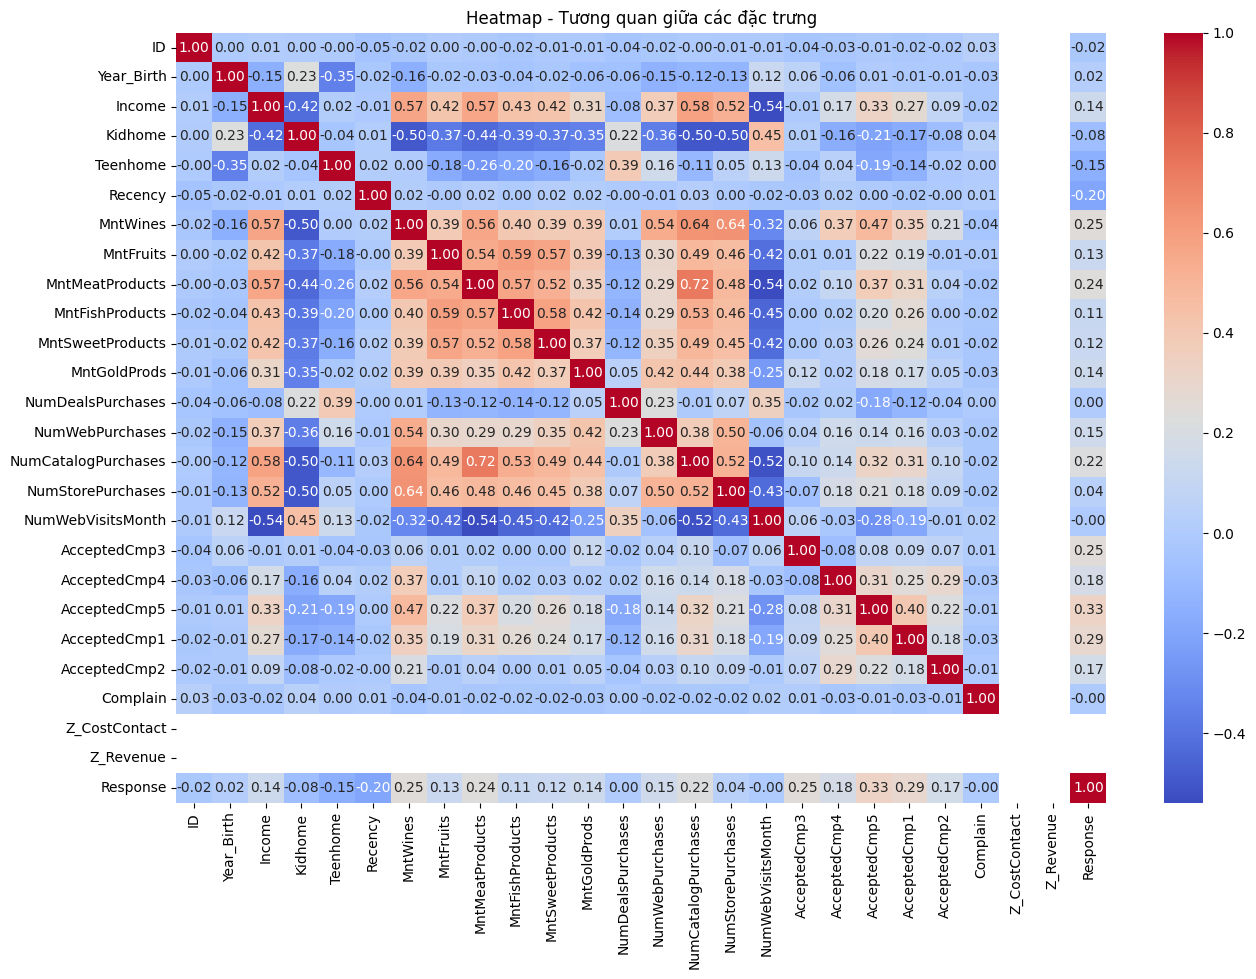

In [33]:
# Tính ma trận tương quan giữa các đặc trưng số
def correlation_matrix(data_df):
    correlation_matrix = data_df.corr(numeric_only=True)

    # Vẽ biểu đồ heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Heatmap - Tương quan giữa các đặc trưng")
    plt.show()

correlation_matrix(data_df)

# **3. Câu hỏi**

## Câu hỏi 1: Làm sao để phân loại khách hàng và phân loại như thế nào?
### Gồm 3 loại: **trung thành, tiềm năng, giá trị thấp**

### Lợi ích của bài toán

#### 1. Quản lý khách hàng hiệu quả
- Xác định rõ ai mang lại giá trị lớn, ai cần đầu tư nhiều hơn.

#### 2. Tối ưu hóa chiến lược tiếp thị
- Tiết kiệm chi phí tiếp thị và tăng hiệu quả chiến dịch bằng cách tập trung đúng nhóm khách hàng.

#### 3. Duy trì và phát triển khách hàng trung thành
- Xây dựng mối quan hệ bền vững với khách hàng giá trị cao.
---

## Câu hỏi 2: Các yếu tố nào thúc đẩy khách hàng tiềm năng (Potential) chuyển thành khách hàng trung thành (Loyal)?

### Lợi ích của bài toán

#### 1. Tăng doanh thu
- Nhóm khách hàng trung thành chi tiêu nhiều hơn đáng kể so với nhóm tiềm năng.

- Bằng cách tối ưu hóa việc chuyển đổi, doanh thu tổng thể của công ty sẽ được cải thiện mà không cần chi phí lớn để thu hút khách hàng mới.

#### 2. Nâng cao tỷ lệ giữ chân khách hàng
- Hiểu được yếu tố thúc đẩy hành vi mua sắm của nhóm tiềm năng giúp công ty giảm tỷ lệ rời bỏ khách hàng.

- Chi phí giữ chân khách hàng thấp hơn nhiều so với chi phí tìm kiếm khách hàng mới.

#### 3. Xây dựng lợi thế cạnh tranh
- Tạo dựng một nhóm khách hàng trung thành lớn mạnh giúp công ty đạt được sự ổn định về doanh thu và phát triển bền vững.

- Một nhóm trung thành mạnh mẽ cũng giúp xây dựng danh tiếng tốt và thu hút khách hàng mới thông qua giới thiệu.
---

# **4. Tiền xử lý và phân tích dữ liệu**

## Câu hỏi 1: Làm sao để phân loại khách hàng và phân loại như thế nào?
Nguyên tắc: Dựa trên `Income`, `Total Spent`, `Total Purchases`, `Recency`, `Complain`, `Campaign`

### **Tiền xử lý dữ liệu**

#### 1. Các cột đặc trưng tổng hợp
- **Total Spent**: Tổng chi tiêu của khách hàng trên các danh mục sản phẩm.
  - **Tính toán**:
    $$ 
    \text{Total Spent} = \text{MntWines} + \text{MntFruits} + \text{MntMeatProducts} + \text{MntFishProducts} + \text{MntSweetProducts} + \text{MntGoldProds}
    $$ 
  - **Ý nghĩa**: Đo lường tổng mức chi tiêu của khách hàng, hỗ trợ đánh giá giá trị khách hàng.
  
- **Total Purchases**: Tổng số lần mua hàng qua các kênh.
  - **Tính toán**:
    $$ 
    \text{Total Purchases} = \text{NumWebPurchases} + \text{NumCatalogPurchases} + \text{NumStorePurchases}
    $$ 
  - **Ý nghĩa**: Đo lường mức độ mua sắm của khách hàng.

- **Campaign**: Số chiến dịch tiếp thị mà khách hàng phản hồi tích cực.
  - **Tính toán**:
    $$ 
    \text{Campaign} = \text{AcceptedCmp1} + \text{AcceptedCmp2} + \text{AcceptedCmp3} + \text{AcceptedCmp4} + \text{AcceptedCmp5}
    $$ 
  - **Ý nghĩa**: Đánh giá mức độ quan tâm đến các chiến dịch tiếp thị.

In [34]:
# Tạo các cột đặc trưng tổng hợp từ dữ liệu
data_df['Total Spent'] = data_df['MntWines'] + data_df['MntFruits'] + data_df['MntMeatProducts'] + \
                         data_df['MntFishProducts'] + data_df['MntSweetProducts'] + data_df['MntGoldProds']
data_df['Total Purchases'] = data_df['NumWebPurchases'] + data_df['NumCatalogPurchases'] + data_df['NumStorePurchases']
data_df['Campaign'] = data_df['AcceptedCmp1'] + data_df['AcceptedCmp2'] + data_df['AcceptedCmp3'] + data_df['AcceptedCmp4'] + data_df['AcceptedCmp5']
# Tạo dataFrame mới từ data_df
data_customer = data_df[['ID','Income', 'Total Spent', 'Total Purchases', 'Recency', 'Complain', 'Campaign']].copy()
data_customer

,ID,Income,Total Spent,Total Purchases,Recency,Complain,Campaign
0,5524,58138.0,1617,22,58,0,0
1,2174,46344.0,27,4,38,0,0
2,4141,71613.0,776,20,26,0,0
3,6182,26646.0,53,6,26,0,0
4,5324,58293.0,422,14,94,0,0
...,...,...,...,...,...,...,...
2235,10870,61223.0,1341,16,46,0,0
2236,4001,64014.0,444,15,56,0,1
2237,7270,56981.0,1241,18,91,0,1
2238,8235,69245.0,843,21,8,0,0


#### 2. Chuẩn hóa dữ liệu
- **Phương pháp chuẩn hóa**:
  - Công thức:
    $$ 
    \text{normalized\_value} = \frac{\text{value} - \text{min}}{\text{max} - \text{min}}
    $$ 
  - Áp dụng cho các cột:
    - `Income`
    - `Total Spent`
    - `Total Purchases`
    - `Recency`
    - `Campaign`

In [35]:
tmp = data_customer[['Income', 'Total Spent', 'Total Purchases', 'Recency', 'Campaign']]
normalized_data = (tmp - tmp.min())/(tmp.max()-tmp.min())
normalized_data

,Income,Total Spent,Total Purchases,Recency,Campaign
0,0.087207,0.639683,0.68750,0.585859,0.00
1,0.069516,0.008730,0.12500,0.383838,0.00
2,0.107420,0.305952,0.62500,0.262626,0.00
3,0.039969,0.019048,0.18750,0.262626,0.00
4,0.087440,0.165476,0.43750,0.949495,0.00
...,...,...,...,...,...
2235,0.091835,0.530159,0.50000,0.464646,0.00
2236,0.096021,0.174206,0.46875,0.565657,0.25
2237,0.085472,0.490476,0.56250,0.919192,0.25
2238,0.103868,0.332540,0.65625,0.080808,0.00


#### 3. Chọn trọng số và điểm cộng
- **Trọng số**:
  - `Income`: 0.25
  - `Total Spent`: 0.35
  - `Total Purchases`: 0.2
  - `Recency`: 0.1
  - `Campaign`: 0.1
- **Điểm cộng**:
  - Khách hàng không có khiếu nại (`Complain = 0`) được cộng thêm 0.05 điểm.

In [36]:
tmp = data_customer[['Income', 'Total Spent', 'Total Purchases', 'Recency', 'Campaign']]
normalized_data = (tmp - tmp.min())/(tmp.max()-tmp.min())

# Trọng số cho từng cột
weights = {
    'Income': 0.25,
    'Total Spent': 0.35,
    'Total Purchases': 0.2,
    'Recency': 0.1,
    'Campaign': 0.1
}

# Điểm cộng
bonus_complain = (data_customer['Complain'] == 0)*0.05

### Phân tích dữ liệu

#### 1. Tính toán điểm tổng hợp
- Công thức:
  $$ 
  \text{Weighted Score} = \sum (\text{normalized\_value} \times \text{weight}) + \text{bonus\_complain}
  $$ 
- **Ý nghĩa**:
  - Đánh giá và xếp hạng khách hàng dựa trên nhiều yếu tố như thu nhập, chi tiêu, mua sắm, thời gian mua gần nhất, và phản hồi tiếp thị.

In [37]:
# Nhân trọng số và tính tổng trọng số
data_customer['Weighted Score'] = (
    normalized_data * pd.Series(weights)
).sum(axis=1)  + bonus_complain # Cộng thêm cho điểm cộng

data_customer

,ID,Income,Total Spent,Total Purchases,Recency,Complain,Campaign,Weighted Score
0,5524,58138.0,1617,22,58,0,0,0.491777
1,2174,46344.0,27,4,38,0,0,0.133818
2,4141,71613.0,776,20,26,0,0,0.335201
3,6182,26646.0,53,6,26,0,0,0.130422
4,5324,58293.0,422,14,94,0,0,0.312226
...,...,...,...,...,...,...,...,...
2235,10870,61223.0,1341,16,46,0,0,0.404979
2236,4001,64014.0,444,15,56,0,1,0.310293
2237,7270,56981.0,1241,18,91,0,1,0.472454
2238,8235,69245.0,843,21,8,0,0,0.331687


#### 2. Phân loại khách hàng:
**Nguyên tắc**: Tính toán ngưỡng phân vị (quantile):
* Ngưỡng trung thành (Loyal) (70%):   
    * Những khách hàng có điểm Weighted Score từ 70% trở lên thuộc nhóm Loyal.
* Ngưỡng tiềm năng (Potential) (20%):   
    * Những khách hàng có điểm Weighted Score từ 20% đến dưới 70% thuộc nhóm Potential.
* Phần còn lại (low_value):     
    * Những khách hàng có điểm Weighted Score dưới 20% thuộc nhóm Low Value.


In [38]:
# Tính các ngưỡng phân vị (quantiles) cho Weighted Score
loyal_threshold = data_customer['Weighted Score'].quantile(0.7)  # Ngưỡng 70% (top 30% khách hàng)
potential_threshold = data_customer['Weighted Score'].quantile(0.2)  # Ngưỡng 20% tiếp theo

# Tạo một cột mới 'Customer Type' và gán giá trị mặc định là 'Low Value'
data_customer['Customer Type'] = 'Low Value'

# Gán nhóm 'Loyal' cho các khách hàng có Weighted Score >= ngưỡng 70%
data_customer.loc[data_customer['Weighted Score'] >= loyal_threshold, 'Customer Type'] = 'Loyal'

# Gán nhóm 'Potential' cho các khách hàng có Weighted Score nằm giữa ngưỡng 20% và 70%
data_customer.loc[
    (data_customer['Weighted Score'] >= potential_threshold) & 
    (data_customer['Weighted Score'] < loyal_threshold), 
    'Customer Type'
] = 'Potential'
os.makedirs("Classified_customers", exist_ok=True)
# Lưu tất cả khách hàng vào một file CSV
data_customer.to_csv('Classified_customers/classified_all_customers.csv', index=False)

# Lọc và lưu từng nhóm khách hàng vào các file CSV riêng biệt
data_customer[data_customer['Customer Type'] == 'Loyal'].to_csv('Classified_customers/loyal_customers.csv', index=False)
data_customer[data_customer['Customer Type'] == 'Potential'].to_csv('Classified_customers/potential_customers.csv', index=False)
data_customer[data_customer['Customer Type'] == 'Low Value'].to_csv('Classified_customers/low_value_customers.csv', index=False)

# Đường dẫn các file CSV đã lưu
{
    "classified_all_customers": 'classified_customers/classified_all_customers.csv',
    "loyal_customers": 'Classified_customers/loyal_customers.csv',
    "potential_customers": 'Classified_customers/potential_customers.csv',
    "low_value_customers": 'Classified_customers/low_value_customers.csv'
}

{'classified_all_customers': 'classified_customers/classified_all_customers.csv',
 'loyal_customers': 'Classified_customers/loyal_customers.csv',
 'potential_customers': 'Classified_customers/potential_customers.csv',
 'low_value_customers': 'Classified_customers/low_value_customers.csv'}

### Trực quan kết quả

Biểu đồ histogram hiển thị phân phối của `Weighted Score` cùng với hai đường phân vị đại diện cho các ngưỡng phân loại khách hàng:

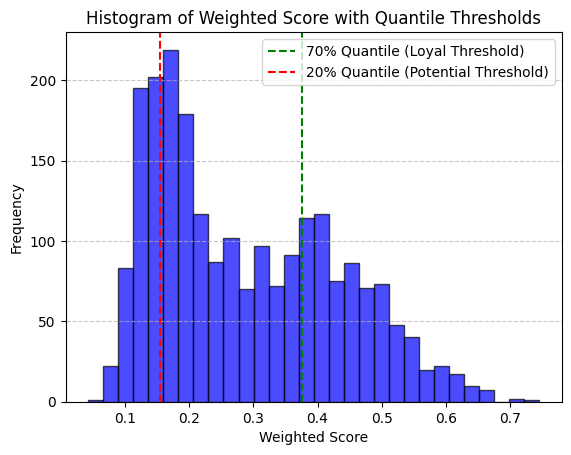

In [39]:
# Tính ngưỡng phân vị
loyal_threshold = data_customer['Weighted Score'].quantile(0.7)  # Ngưỡng 70%
potential_threshold = data_customer['Weighted Score'].quantile(0.2)  # Ngưỡng 20%

# Vẽ biểu đồ histogram
plt.hist(data_customer['Weighted Score'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(loyal_threshold, color='green', linestyle='--', label='70% Quantile (Loyal Threshold)')  # Đường phân vị 70%
plt.axvline(potential_threshold, color='red', linestyle='--', label='20% Quantile (Potential Threshold)')  # Đường phân vị 20%

# Tùy chỉnh tiêu đề và nhãn
plt.title('Histogram of Weighted Score with Quantile Thresholds')
plt.xlabel('Weighted Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

**Nhận xét:**   
1. Phân phối chính

    * Phân phối lệch phải:

        * Hầu hết các giá trị của Weighted Score tập trung ở khoảng từ 0.1 đến 0.4.
        * Điều này có nghĩa là phần lớn khách hàng có điểm số thấp đến trung bình.
    * Phần đuôi nhỏ ở bên phải:

        * Rất ít khách hàng có Weighted Score lớn hơn 0.6.
        * Đây là nhóm khách hàng giá trị cao (Loyal) và cần đặc biệt quan tâm.
2. Nhóm khách hàng

    * Nhóm "Low Value":

        * Nằm ở bên trái đường đỏ (0 < Weighted Score < 20% quantile).
        * Chiếm tỷ lệ đáng kể trong tập dữ liệu.
        * Đây là nhóm có ít giá trị nhất và cần các chiến lược tiếp thị đặc biệt để kích thích tiêu dùng hoặc có thể bỏ qua trong các chiến dịch quan trọng.
    * Nhóm "Potential":

        * Nằm giữa hai đường (20% quantile ≤ Weighted Score < 70% quantile).
        * Chiếm một phần lớn trong tập dữ liệu.
        * Đây là nhóm khách hàng tiềm năng, có thể phát triển thành khách hàng trung thành thông qua các chiến lược tiếp thị phù hợp.
    * Nhóm "Loyal":

        * Nằm ở bên phải đường xanh (≥ 70% quantile).
        * Chiếm tỷ lệ nhỏ nhưng có giá trị cao nhất.
        * Đây là nhóm khách hàng trung thành, cần được giữ chân thông qua các chương trình tri ân, giảm giá đặc biệt hoặc dịch vụ ưu tiên.

Các biểu đồ Scatter cho thấy mối quan hệ giữa Weighted Score và 3 đặc trưng `Total Spent`, `Total Purchases`, `Income` Hai đường phân vị được thêm vào để phân loại nhóm khách hàng:
* Đường đỏ: Ngưỡng phân vị 20% (Potential Threshold).
* Đường xanh lá: Ngưỡng phân vị 70% (Loyal Threshold).

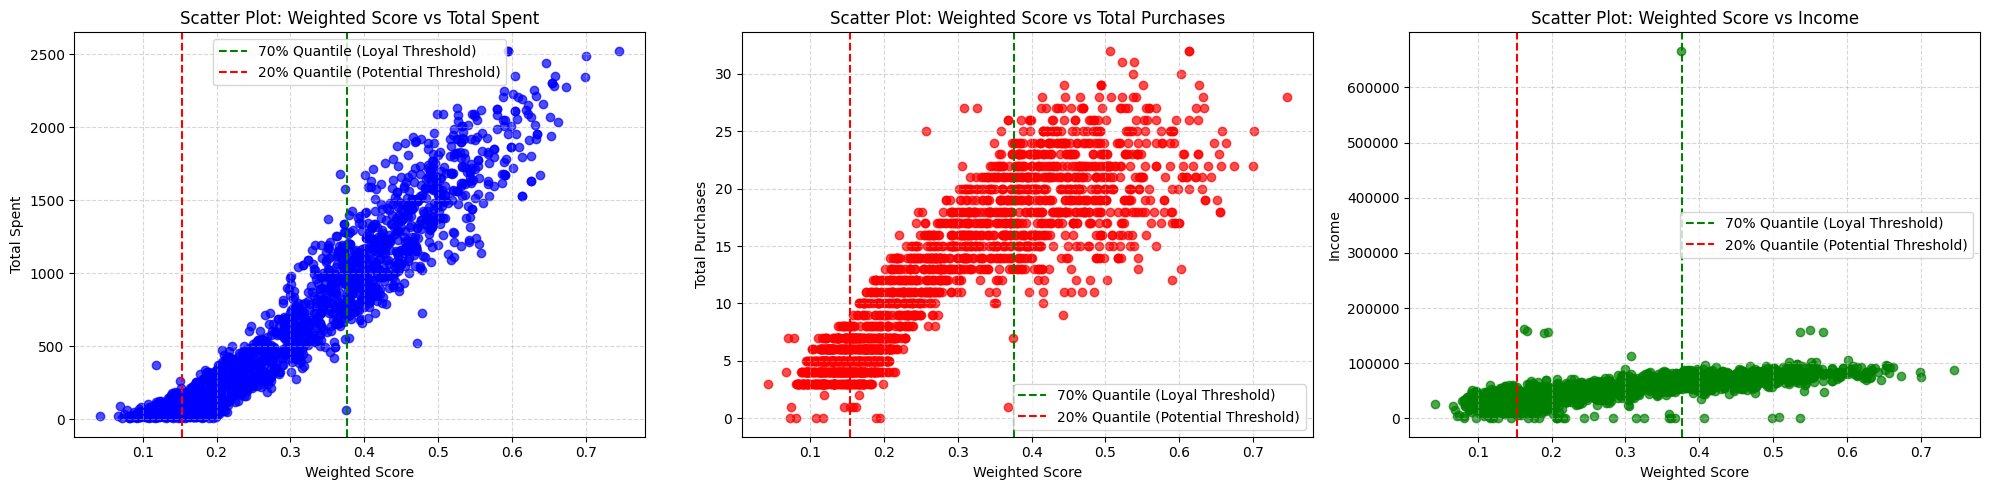

In [40]:
# Tính ngưỡng phân vị
loyal_threshold = data_customer['Weighted Score'].quantile(0.7)  # Ngưỡng 70%
potential_threshold = data_customer['Weighted Score'].quantile(0.2)  # Ngưỡng 20%

# Tạo subplots
plt.figure(figsize=(20, 5))  # Kích thước toàn bộ biểu đồ

# Biểu đồ 1: Weighted Score vs Total Spent
plt.subplot(1, 3, 1)
plt.scatter(data_customer['Weighted Score'], data_customer['Total Spent'], color='blue', alpha=0.7)
plt.axvline(loyal_threshold, color='green', linestyle='--', label='70% Quantile (Loyal Threshold)')
plt.axvline(potential_threshold, color='red', linestyle='--', label='20% Quantile (Potential Threshold)')
plt.title('Scatter Plot: Weighted Score vs Total Spent')
plt.xlabel('Weighted Score')
plt.ylabel('Total Spent')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')

# Biểu đồ 2: Weighted Score vs Total Purchases
plt.subplot(1, 3, 2)
plt.scatter(data_customer['Weighted Score'], data_customer['Total Purchases'], color='red', alpha=0.7)
plt.axvline(loyal_threshold, color='green', linestyle='--', label='70% Quantile (Loyal Threshold)')
plt.axvline(potential_threshold, color='red', linestyle='--', label='20% Quantile (Potential Threshold)')
plt.title('Scatter Plot: Weighted Score vs Total Purchases')
plt.xlabel('Weighted Score')
plt.ylabel('Total Purchases')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')

# Biểu đồ 3: Weighted Score vs Income
plt.subplot(1, 3, 3)
plt.scatter(data_customer['Weighted Score'], data_customer['Income'], color='green', alpha=0.7)
plt.axvline(loyal_threshold, color='green', linestyle='--', label='70% Quantile (Loyal Threshold)')
plt.axvline(potential_threshold, color='red', linestyle='--', label='20% Quantile (Potential Threshold)')
plt.title('Scatter Plot: Weighted Score vs Income')
plt.xlabel('Weighted Score')
plt.ylabel('Income')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')

# Điều chỉnh bố cục để tránh chồng lấn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


**Nhận xét**    

1. Biểu đồ 1: Weighted Score vs Total Spent 
    * Mối quan hệ:

        * Mối quan hệ giữa Weighted Score và Total Spent là tăng dần rõ ràng.
        * Khách hàng có Weighted Score cao thường có tổng chi tiêu lớn hơn.
    * Phân loại nhóm khách hàng:

        * Nhóm Low Value (bên trái đường đỏ): Tổng chi tiêu thấp, tập trung dưới 500.
        * Nhóm Potential (giữa hai đường): Có tổng chi tiêu trung bình, từ 0 đến khoảng 1500.
        * Nhóm Loyal (bên phải đường xanh): Tổng chi tiêu cao, từ 500 trên 2500.
2. Biểu đồ 2: Weighted Score vs Total Purchases
    * Mối quan hệ:

        * Mối quan hệ giữa Weighted Score và Total Purchases cũng là tăng dần.
        * Khách hàng có điểm số cao hơn có xu hướng thực hiện nhiều giao dịch mua hàng hơn.
    * Phân loại nhóm khách hàng:

        * Nhóm Low Value: Tổng số lần mua thấp, thường dưới 10 lần.
        * Nhóm Potential: Tổng số lần mua trung bình, từ 5 đến khoảng 25 lần.
        * Nhóm Loyal: Tổng số lần mua cao, trên 10 đến hơn 30 lần.
3. Biểu đồ 3: Weighted Score vs Income
    * Mối quan hệ:

        * Mối quan hệ giữa Weighted Score và Income không rõ ràng như hai biểu đồ trước.
        * Thu nhập của khách hàng khá đa dạng trong mọi nhóm Weighted Score.    
    * Phân loại nhóm khách hàng:

        * Tăng dần từ 0 - 100,000, có 1 số điểm nhiễu.
**Tóm tắt**     
* Mối quan hệ:

    * Weighted Score có mối quan hệ tăng dần rõ ràng với Total Spent và Total Purchases.
    * Mối quan hệ giữa Weighted Score và Income kém rõ ràng hơn.
* Phân loại khách hàng:

    * Hai ngưỡng phân vị (20% và 70%) cho phép xác định rõ ba nhóm khách hàng: Low Value, Potential, và Loyal.
    * Nhóm "Loyal" có giá trị cao nhất (chi tiêu nhiều, mua sắm thường xuyên) và cần được ưu tiên chăm sóc.
    * Nhóm "Potential" là nhóm có tiềm năng phát triển thành "Loyal" thông qua các chiến lược tiếp thị.
    * Nhóm "Low Value" cần xem xét có nên đầu tư thêm vào họ hay không.

## Câu hỏi 2: Các yếu tố nào thúc đẩy khách hàng tiềm năng (Potential) chuyển thành khách hàng trung thành (Loyal)?
Nguyên tắc: Dựa trên 2 dataset `loyal_customers.csv` và `potential_customers.csv`

### **Tiền xử lý dữ liệu**

Lấy dữ liệu từ 2 tập dataset trên và nối theo hàng

In [41]:
# Tiền xử lý dữ liệu
loyal_customers = pd.read_csv('Classified_customers/loyal_customers.csv')
potential_customers = pd.read_csv('Classified_customers/potential_customers.csv')

# Gộp dữ liệu hai nhóm
combined_data = pd.concat([loyal_customers, potential_customers], ignore_index=True)
combined_data

,ID,Income,Total Spent,Total Purchases,Recency,Complain,Campaign,Weighted Score,Customer Type
0,5524,58138.0,1617,22,58,0,0,0.491777,Loyal
1,2125,63033.0,1102,15,82,0,0,0.402577,Loyal
2,2114,82800.0,1315,25,23,0,2,0.492477,Loyal
3,6565,76995.0,1782,24,91,0,1,0.592598,Loyal
4,5376,2447.0,1730,28,42,0,0,0.507925,Loyal
...,...,...,...,...,...,...,...,...,...
1787,9432,666666.0,62,7,23,0,0,0.374899,Potential
1788,8372,34421.0,30,3,81,0,0,0.166948,Potential
1789,4001,64014.0,444,15,56,0,1,0.310293,Potential
1790,8235,69245.0,843,21,8,0,0,0.331687,Potential



### **Phân tích dữ liệu**

### So sánh trung bình các chỉ số giữa nhóm Loyal và Potential
- **Recency**: Số ngày kể từ lần mua gần nhất.
- **Total Spent**: Tổng chi tiêu của khách hàng.
- **Income**: Thu nhập của khách hàng.
- **Campaign**: Số chiến dịch tiếp thị được chấp nhận.

Kết quả so sánh sẽ giúp xác định các yếu tố chính ảnh hưởng đến việc chuyển đổi từ nhóm **Potential** sang **Loyal**.


In [42]:
# So sánh các đặc điểm trung bình giữa hai nhóm
comparison_factors = pd.DataFrame({
    'Metric': ['Recency', 'Total Spent', 'Income', 'Campaign'],
    'Potential Mean': [
        potential_customers['Recency'].mean(),
        potential_customers['Total Spent'].mean(),
        potential_customers['Income'].mean(),
        potential_customers['Campaign'].mean()
    ],
    'Loyal Mean': [
        loyal_customers['Recency'].mean(),
        loyal_customers['Total Spent'].mean(),
        loyal_customers['Income'].mean(),
        loyal_customers['Campaign'].mean()
    ]
})

# Hiển thị kết quả phân tích
comparison_factors

,Metric,Potential Mean,Loyal Mean
0,Recency,53.820536,55.690476
1,Total Spent,366.138393,1373.116071
2,Income,47188.345536,73352.526786
3,Campaign,0.136607,0.733631


Kết quả so sánh giữa nhóm Potential và Loyal dựa trên các yếu tố chính:

1. Recency (Số ngày từ lần mua gần nhất):

    * Nhóm Potential: Trung bình 53.82 ngày.
    * Nhóm Loyal: Trung bình 55.69 ngày.
    * => Khoảng cách mua hàng gần tương đồng, không phải là yếu tố phân biệt chính.
2. Total Spent (Tổng chi tiêu):

    * Nhóm Potential: Trung bình 366.14.
    * Nhóm Loyal: Trung bình 1373.12.
    * => Nhóm Loyal chi tiêu cao hơn khoảng 4 lần, cho thấy chi tiêu là yếu tố quan trọng trong chuyển đổi.
3. Income (Thu nhập):

    * Nhóm Potential: Trung bình 47,188.
    * Nhóm Loyal: Trung bình 73,352.
    * => Thu nhập cao hỗ trợ khả năng chi tiêu nhiều hơn của nhóm Loyal.
4. Campaign (Số chiến dịch đã chấp nhận):

    * Nhóm Potential: Trung bình 0.137.
    * Nhóm Loyal: Trung bình 0.734.     
    * => Nhóm Loyal phản hồi chiến dịch tốt hơn nhiều, cho thấy đây là yếu tố cần đẩy mạnh để thúc đẩy chuyển đổi nhóm Potential.

Nhận định   
* Chi tiêu (Total Spent) và tương tác với chiến dịch (Campaign) là hai yếu tố quyết định trong việc chuyển nhóm Potential thành Loyal.
* Thu nhập (Income) là yếu tố hỗ trợ nhưng không hoàn toàn quyết định.
* Khoảng cách mua gần đây (Recency) không phải yếu tố chính trong phân biệt giữa hai nhóm.

### Trực quan kết quả

#### Biểu đồ histogram hiển thị phân phối tần suất của cột `Weighted Score`

In [43]:
Metric_value = comparison_factors[['Loyal Mean', 'Potential Mean']]
normalized_metric_value = Metric_value.div(Metric_value.sum(axis=1), axis=0)*100
normalized_metric_value.index = comparison_factors['Metric']
normalized_metric_value

,Loyal Mean,Potential Mean
Metric,,
Recency,50.853768,49.146232
Total Spent,78.948544,21.051456
Income,60.852826,39.147174
Campaign,84.302326,15.697674


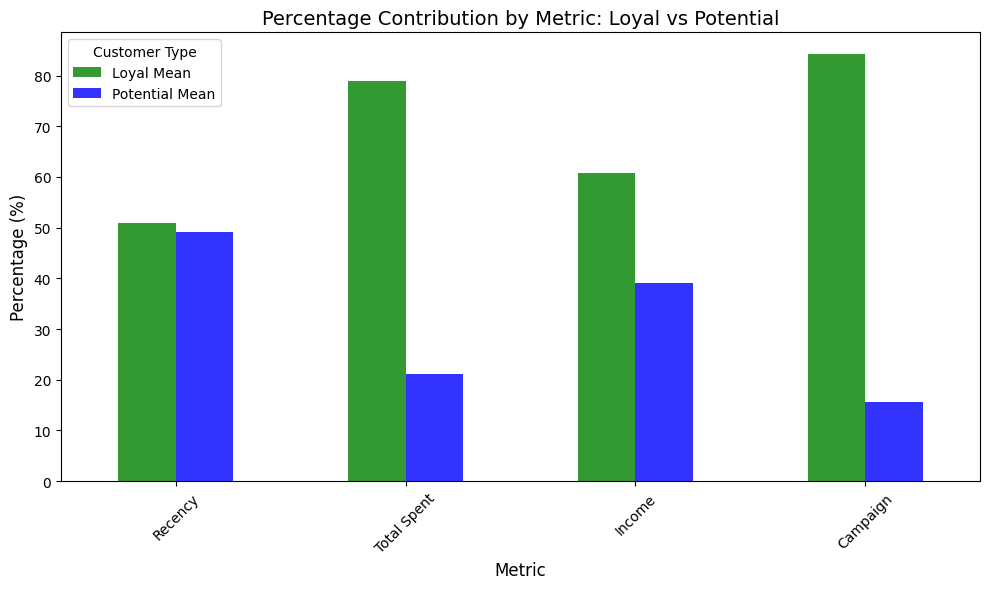

In [44]:
# Vẽ biểu đồ trực quan hóa dữ liệu đã chuẩn hóa
normalized_metric_value.plot(kind='bar', figsize=(10, 6), color=['green', 'blue'], alpha=0.8)

# Thêm thông tin biểu đồ
plt.title('Percentage Contribution by Metric: Loyal vs Potential', fontsize=14)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

**Nhận xét:**
1. Recency (Số ngày từ lần mua gần nhất):

    * Loyal Mean (~ 50%) và Potential Mean (~ 50%) có tỷ lệ gần tương đương.
    * Điều này cho thấy thời gian từ lần mua gần nhất không có sự chênh lệch đáng kể giữa hai nhóm khách hàng.
2. Total Spent (Tổng chi tiêu):

    * Nhóm Loyal chiếm ưu thế rõ rệt (~ 80%), trong khi nhóm Potential đóng góp rất nhỏ (~ 20%).
    * Chi tiêu là một trong những yếu tố phân biệt chính giữa hai nhóm, phản ánh mức độ trung thành gắn liền với mức chi tiêu cao.
3. Income (Thu nhập):

    * Nhóm Loyal đóng góp cao hơn (~ 60%), nhưng nhóm Potential cũng có tỷ lệ đáng kể (~ 40%).
    * Điều này cho thấy thu nhập là yếu tố quan trọng, nhưng nhóm Potential vẫn có tiềm năng để tăng chi tiêu.
4. Campaign (Số chiến dịch được chấp nhận):

    * Nhóm Loyal có tỷ lệ vượt trội (~ 85%), trong khi nhóm Potential chỉ chiếm ~ 15%.
    * Mức độ phản hồi với chiến dịch là một yếu tố mạnh mẽ giúp xây dựng lòng trung thành. Nhóm Loyal có sự tương tác cao hơn đáng kể với các chiến dịch tiếp thị.   
    
**Hướng chiến lược dựa trên nhận xét:**
1. Tăng chi tiêu nhóm Potential:

    * Đẩy mạnh các chương trình khuyến mãi hoặc ưu đãi để tăng tổng chi tiêu, nhằm đưa nhóm Potential gần hơn với nhóm Loyal.
2. Cải thiện tương tác với chiến dịch:

    * Tập trung cá nhân hóa chiến dịch tiếp thị, tăng mức độ tương tác của nhóm Potential với các chương trình khuyến mãi hoặc chiến lược tiếp cận.
3. Đánh giá thêm khả năng chuyển đổi:

    * Dựa trên dữ liệu thu nhập và tương tác chiến dịch, xác định khách hàng có khả năng cao nhất để đầu tư chuyển đổi.